In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

/home/sunbeam/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
df = pd.read_csv('crime_std.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,0.746988,0.654110,0.440678,0.359173
1,1,0.554217,0.746575,0.271186,0.961240
2,2,0.439759,0.852740,0.813559,0.612403
3,3,0.481928,0.496575,0.305085,0.315245
4,4,0.493976,0.791096,1.000000,0.860465


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


## Create hierarchical cluster

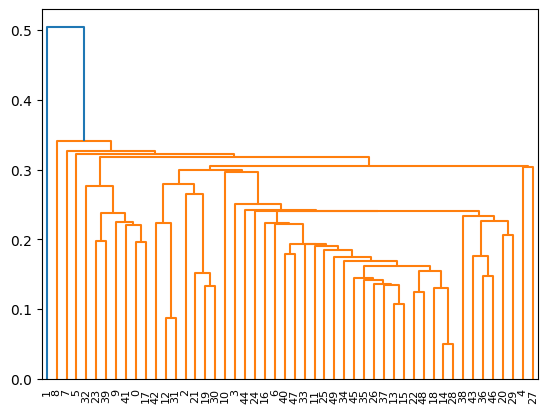

In [5]:
from scipy.cluster import hierarchy

linkage = hierarchy.linkage(df, 'single')
dendo = hierarchy.dendrogram(linkage)

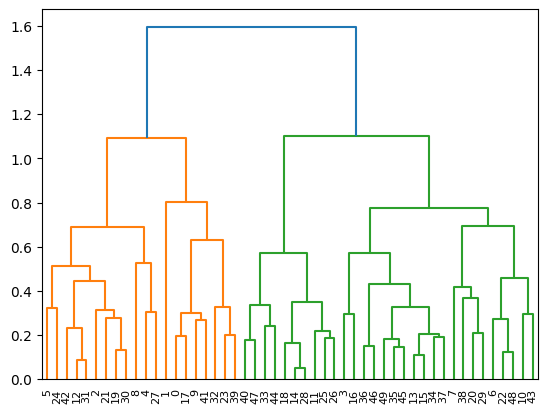

In [6]:
linkage = hierarchy.linkage(df, 'complete')
dendo = hierarchy.dendrogram(linkage)

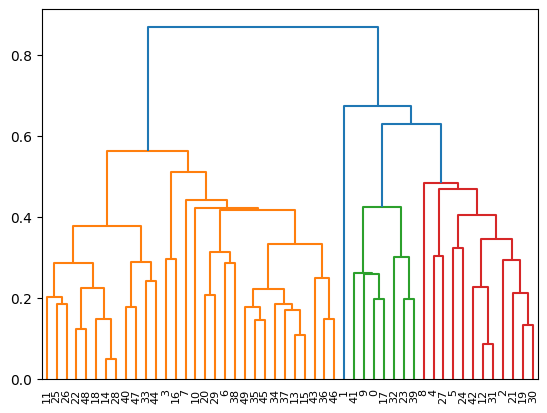

In [7]:
linkage = hierarchy.linkage(df, 'average')
dendo = hierarchy.dendrogram(linkage)

## Use ski-kit Learn

In [8]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, linkage='complete')
model.fit(df)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


AgglomerativeClustering(linkage='complete', n_clusters=4)

In [9]:
model.labels_

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

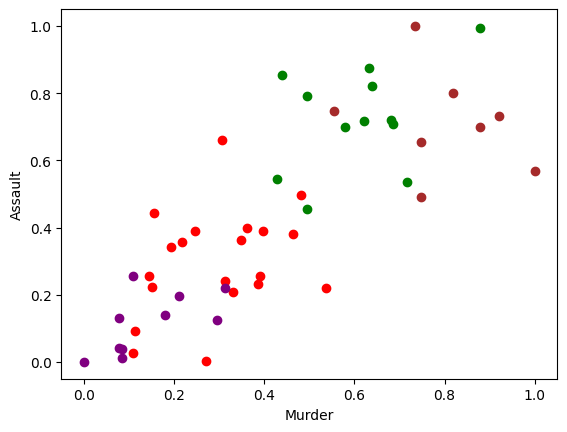

In [14]:
figure = plt.figure()

colors = ['brown','red','purple','green']
for k in range(len(colors)):
    plt.scatter(df['Murder'][model.labels_==k], df['Assault'][model.labels_==k], color=colors[k])
    plt.xlabel('Murder')
    plt.ylabel('Assault')

## create DBSCAN model

In [18]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=8.0, min_samples=4)
model.fit(df)

DBSCAN(eps=8.0, min_samples=4)

In [19]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

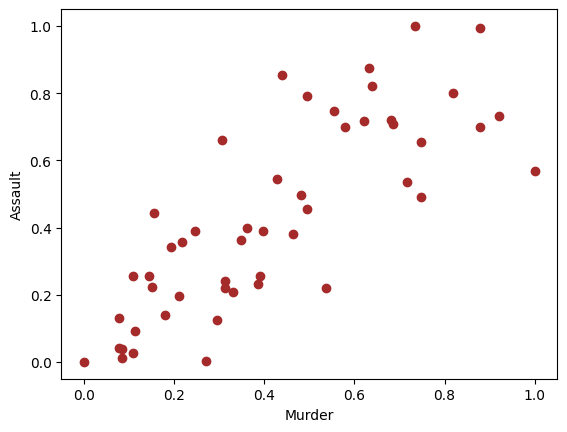

In [20]:
figure = plt.figure()

colors = ['brown','red','purple','green']
for k in range(len(colors)):
    plt.scatter(df['Murder'][model.labels_==k], df['Assault'][model.labels_==k], color=colors[k])
    plt.xlabel('Murder')
    plt.ylabel('Assault')